<a href="https://colab.research.google.com/github/MarwanAhmed20/Lip-Synchronization-with-Wav2Lip-and-GFPGAN/blob/main/Wav2Lip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read data from Google Drive

In [ ]:
from IPython.display import clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/Wav2Lip

10_S.wav  13_K.mp4  96_A.wav  96_E.wav	96_K.wav  processed.mp4


In [ ]:
!mkdir -p wav2lip_model
!cp "/content/gdrive/MyDrive/Wav2Lip/13_K.mp4" "/content/gdrive/MyDrive/Wav2Lip/96_K.wav" "/content/gdrive/MyDrive/Wav2Lip/10_S.wav" /content/wav2lip_model/
!ls /content/wav2lip_model/

10_S.wav  13_K.mp4  96_K.wav


# Wav2Lip

## Clone and Setup Wav2Lip Repository

In [ ]:
!git clone https://github.com/justinjohn0306/Wav2Lip

Cloning into 'Wav2Lip'...
remote: Enumerating objects: 513, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 513 (delta 3), reused 7 (delta 3), pack-reused 505
Receiving objects: 100% (513/513), 29.76 MiB | 24.05 MiB/s, done.
Resolving deltas: 100% (263/263), done.


In [ ]:
!cd Wav2Lip && pip install -r requirements.txt
clear_output()

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118, https://download.pytorch.org/whl/cu118
  Cloning https://github.com/elliottzheng/batch-face.git (to revision master) to /tmp/pip-req-build-jqhwhjl0
  Running command git clone --filter=blob:none --quiet https://github.com/elliottzheng/batch-face.git /tmp/pip-req-build-jqhwhjl0
  Resolved https://github.com/elliottzheng/batch-face.git to commit 1e7069a75d5a709195735ae6670e42acb1e6c367
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.6/839.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 94.0 MB/s eta 0:00:00


In [ ]:
#@title Download Pre-trained Models

!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/wav2lip.pth' -O '/content/Wav2Lip/checkpoints/wav2lip.pth'
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/wav2lip_gan.pth' -O '/content/Wav2Lip/checkpoints/wav2lip_gan.pth'
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/resnet50.pth' -O '/content/Wav2Lip/checkpoints/resnet50.pth'
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/mobilenet.pth' -O '/content/Wav2Lip/checkpoints/mobilenet.pth'
clear_output()

--2024-07-18 23:20:17--  https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth
Resolving www.adrianbulat.com (www.adrianbulat.com)... 45.136.29.207
Connecting to www.adrianbulat.com (www.adrianbulat.com)|45.136.29.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89843225 (86M) [application/octet-stream]
Saving to: ‘Wav2Lip/face_detection/detection/sfd/s3fd.pth’

Wav2Lip/face_detect 100%[===================>]  85.68M  18.7MB/s    in 5.6s    

2024-07-18 23:20:24 (15.3 MB/s) - ‘Wav2Lip/face_detection/detection/sfd/s3fd.pth’ saved [89843225/89843225]



## Perform Lip-sync with Wav2Lip

In [ ]:
output_file_path = '/content/Wav2Lip/results/result_voice.mp4'
inputVideoPath = '/content/wav2lip_model/13_K.mp4'
inputAudioPath = '/content/wav2lip_model/10_S.wav'
checkpoint_path = 'checkpoints/wav2lip_gan.pth'

In [ ]:
# Delete existing output file before processing, if any
if os.path.exists(output_file_path):
    os.remove(output_file_path)

!cd Wav2Lip && python inference.py --checkpoint_path $checkpoint_path --face {inputVideoPath} --audio {inputAudioPath}

clear_output()

Using cuda for inference.
Load checkpoint from: checkpoints/wav2lip_gan.pth
Models loaded
Reading video frames...
Number of frames available for inference: 777
(80, 1902)
Length of mel chunks: 709
  0% 0/6 [00:00<?, ?it/s]face detect time: 3.8734896183013916
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
100% 6/6 [00:06<00:00,  1.13s/it]
wav2lip prediction time: 6.783019065856934
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --ena

### Fine Tuning
Use more padding to include the chin region -- resize_factor to reduce the video resolution


In [ ]:
hd_model = True
checkpoint_path_hd = '/checkpoints/wav2lip.pth'
checkpoint_path = 'checkpoints/wav2lip_gan.pth'

nosmooth = True

In [ ]:
# Delete existing output file before processing, if any
if os.path.exists(output_file_path):
    os.remove(output_file_path)


if hd_model == True:
  !python inference.py --checkpoint_path_hd $checkpoint_path --face {inputVideoPath}--audio {inputAudioPath} --pads 0 20 0 0
else:
  !python inference.py --checkpoint_path $checkpoint_path --face {inputVideoPath}--audio {inputAudioPath}  --pads 0 20 0 0

if os.path.exists(output_file_path):
    clear_output()

In [ ]:
# Delete existing output file before processing, if any
if os.path.exists(output_file_path):
    os.remove(output_file_path)

if hd_model == True:
  !python inference.py --checkpoint_path_hd $checkpoint_path --face {inputVideoPath}--audio {inputAudioPath} --resize_factor 2 --nosmooth
else:
  !python inference.py --checkpoint_path $checkpoint_path --face --face {inputVideoPath}--audio {inputAudioPath}  --resize_factor 2 --nosmooth

if os.path.exists(output_file_path):
    clear_output()

Using cuda for inference.
Load checkpoint from: checkpoints/wav2lip_gan.pth
Models loaded
Reading video frames...
Number of frames available for inference: 777
(80, 1902)
Length of mel chunks: 709
  0% 0/6 [00:00<?, ?it/s]face detect time: 2.2317471504211426
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
100% 6/6 [00:04<00:00,  1.20it/s]
wav2lip prediction time: 4.990408897399902
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --ena

the model generates good results but low resolution, Because the model was trained on low resolution faces.

i can see there is two mouths in the video and when the voice in the auido stops see the lips move that's becuase the lips in the original video move so i want to stop the lips movement

# Freeze Mouth Movements
To ensure that the lips do not move when the audio is silent, we can extract the mouth region from the first frame of the video and use it as a static mouth image for frames where the audio is silent.

In [ ]:
# extract the frames from the original video and save it in extracted_frames folder
import cv2
import os

video_path = '/content/wav2lip_model/13_K.mp4'

frames_dir = '/content/extracted_frames'
os.makedirs(frames_dir, exist_ok=True)

# Extract frames from the video
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
success, frame = cap.read()
count = 0

while success:
    frame_filename = os.path.join(frames_dir, f'frame_{count:04d}.png')
    cv2.imwrite(frame_filename, frame)
    success, frame = cap.read()
    count += 1

cap.release()
frame_count, frames_dir


(777, 'content/extracted_frames')

In [ ]:
# Download the shape-predictor model for facial landmarks
!kaggle datasets download -d sergiovirahonda/shape-predictor-68-face-landmarksdat
!unzip shape-predictor-68-face-landmarksdat.zip

Dataset URL: https://www.kaggle.com/datasets/sergiovirahonda/shape-predictor-68-face-landmarksdat
License(s): unknown
 98% 68.0M/69.3M [00:02<00:00, 35.0MB/s]
100% 69.3M/69.3M [00:02<00:00, 27.1MB/s]


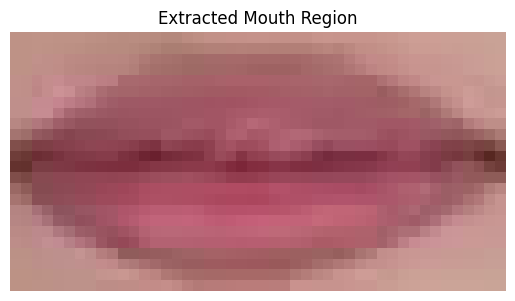

In [ ]:
# Extract landmarks of the face and get the mouth region
import dlib
from imutils import face_utils
import matplotlib.pyplot as plt

# Load the pre-trained facial landmark predictor
predictor_path = "/content/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)

# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()

# Extracts the mouth region from a given frame using the facial landmark predictor.
def extract_mouth_region(frame, predictor):

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)

    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        (mStart, mEnd) = face_utils.FACIAL_LANDMARKS_IDXS["mouth"]
        mouth_points = shape[mStart:mEnd]

        x, y, w, h = cv2.boundingRect(mouth_points)
        return (x, y, w, h)

    return None



# Process the first frame as an example
frame_example_path = os.path.join(frames_dir, 'frame_0000.png')
frame_example = cv2.imread(frame_example_path)

# Extract mouth region
mouth_bbox = extract_mouth_region(frame_example, predictor)

# Display the extracted mouth region
if mouth_bbox is not None:
    x, y, w, h = mouth_bbox
    mouth_roi = frame_example[y:y+h, x:x+w]
    plt.imshow(cv2.cvtColor(mouth_roi, cv2.COLOR_BGR2RGB))
    plt.title("Extracted Mouth Region")
    plt.axis('off')
    plt.show()
else:
    print("Mouth region not detected.")


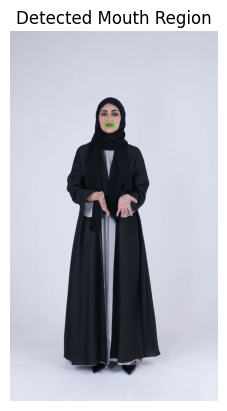

In [ ]:
# Visualizes the detected mouth region in the frame for confirmation.
def visualize_mouth_region(frame, bbox):

    x, y, w, h = bbox
    frame_copy = frame.copy()
    cv2.rectangle(frame_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(frame_copy, cv2.COLOR_BGR2RGB))
    plt.title("Detected Mouth Region")
    plt.axis('off')
    plt.show()

# Visualize the detected mouth region in the example frame
if mouth_bbox is not None:
    visualize_mouth_region(frame_example, mouth_bbox)
else:
    print("Mouth region not detected.")

In [ ]:
# Process each frame to freeze the mouth region during silent audio periods

modified_frames_dir = 'modified_frames'
os.makedirs(modified_frames_dir, exist_ok=True)

# Load the first frame to use as the static mouth image
first_frame_path = os.path.join(frames_dir, 'frame_0000.png')
first_frame = cv2.imread(first_frame_path)
mouth_bbox = extract_mouth_region(first_frame, predictor)

# Crop the mouth region from the first frame
x, y, w, h = mouth_bbox
static_mouth = first_frame[y:y+h, x:x+w]

# Process each frame
for frame_filename in sorted(os.listdir(frames_dir)):
    frame_path = os.path.join(frames_dir, frame_filename)
    frame = cv2.imread(frame_path)

    if frame is not None:
        bbox = extract_mouth_region(frame, predictor)

        if bbox is not None:
            x, y, w, h = bbox
            if frame[y:y+h, x:x+w].shape != static_mouth.shape:
                static_mouth_resized = cv2.resize(static_mouth, (w, h))
                frame[y:y+h, x:x+w] = static_mouth_resized
            else:
                frame[y:y+h, x:x+w] = static_mouth

        modified_frame_path = os.path.join(modified_frames_dir, frame_filename)
        cv2.imwrite(modified_frame_path, frame)

Frame slice shape: (24, 46, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (23, 47, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (24, 46, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (24, 46, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (25, 46, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (25, 46, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (26, 46, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (26, 46, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (27, 46, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (28, 47, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (29, 47, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (29, 45, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (30, 47, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (31, 47, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (31, 48, 3)
Static mouth shape: (24, 46, 3)
Frame slice shape: (30, 48, 3)
Static mouth shape: (24,

In [ ]:
# Convert processed frames back to video
output_video_path = 'output_video.mp4'
fps = 30  # Set the frames per second for the output video

frame_files = sorted([os.path.join(modified_frames_dir, f) for f in os.listdir(modified_frames_dir) if f.endswith('.png')])
frame = cv2.imread(frame_files[0])
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

for frame_file in frame_files:
    frame = cv2.imread(frame_file)
    video.write(frame)

video.release()

# preprocess the audio
To trim the audio to where the voice begins

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.silence import detect_nonsilent

# Load your audio file
audio = AudioSegment.from_file("/content/wav2lip_model/96_K.wav")

# Detect nonsilent chunks in the audio file
nonsilent_chunks = detect_nonsilent(audio, min_silence_len=1000, silence_thresh=audio.dBFS-16)

# If there's at least one nonsilent chunk, trim the audio to that part
if nonsilent_chunks:
    start_trim = nonsilent_chunks[0][0]
    end_trim = nonsilent_chunks[-1][1]
    trimmed_audio = audio[start_trim:end_trim]

    # Save the trimmed audio
    trimmed_audio.export("trimmed_96_K.wav", format="wav")
else:
    print("No nonsilent parts detected.")

print("Trimming complete!")



Trimming complete!


# Wav2Lip-GFPGAN
model with good accuracy and high quality

## Get the repository and install the dependencies

In [ ]:
!git clone https://github.com/ajay-sainy/Wav2Lip-GFPGAN.git

Cloning into 'Wav2Lip-GFPGAN'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 195 (delta 18), reused 9 (delta 9), pack-reused 160
Receiving objects: 100% (195/195), 29.94 MiB | 20.29 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [ ]:
%cd /content/Wav2Lip-GFPGAN
!pip install -r requirements.txt

In [ ]:
#@title Download the pretrained models:

!wget 'https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth' -O '/content/Wav2Lip-GFPGAN/Wav2Lip-master/face_detection/detection/sfd/s3fd.pth'
!gdown https://drive.google.com/uc?id=1fQtBSYEyuai9MjBOF8j7zZ4oQ9W2N64q --output '/content/Wav2Lip-GFPGAN/Wav2Lip-master/checkpoints/'

--2024-07-20 19:17:05--  https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth
Resolving www.adrianbulat.com (www.adrianbulat.com)... 45.136.29.207
Connecting to www.adrianbulat.com (www.adrianbulat.com)|45.136.29.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89843225 (86M) [application/octet-stream]
Saving to: ‘/content/Wav2Lip-GFPGAN/Wav2Lip-master/face_detection/detection/sfd/s3fd.pth’

/content/Wav2Lip-GF 100%[===================>]  85.68M  22.1MB/s    in 4.9s    

2024-07-20 19:17:10 (17.6 MB/s) - ‘/content/Wav2Lip-GFPGAN/Wav2Lip-master/face_detection/detection/sfd/s3fd.pth’ saved [89843225/89843225]

Downloading...
From (original): https://drive.google.com/uc?id=1fQtBSYEyuai9MjBOF8j7zZ4oQ9W2N64q
From (redirected): https://drive.google.com/uc?id=1fQtBSYEyuai9MjBOF8j7zZ4oQ9W2N64q&confirm=t&uuid=672e621f-8615-4a47-8b45-43a6511ec667
To: /content/Wav2Lip-GFPGAN/Wav2Lip-master/checkpoints/wav2lip.pth
100% 436M/436M [00:03<00:00, 135MB/s]


In [ ]:
!cp "/content/gdrive/MyDrive/Wav2Lip/processed.mp4"  /content/wav2lip_model/
!ls /content/wav2lip_model/

10_S.wav  13_K.mp4  96_K.wav  processed.mp4  trimmed_96_K.wav


## Perform Lip-sync with Wav2Lip-GFPGAN

In [ ]:
import os
base_Path = "/content/Wav2Lip-GFPGAN"
wav2lip_folder = 'Wav2Lip-master'
outputPath = base_Path + '/outputs'

inputAudioPath =  '/content/wav2lip_model/10_S.wav'
inputVideoPath =  '/content/wav2lip_model/processed.mp4'
output_file_path = base_Path + '/outputs/result.mp4'
checkpoint_path = 'checkpoints/wav2lip.pth'

if not os.path.exists(outputPath):
  os.makedirs(outputPath)


In [ ]:
%cd {base_Path}
import os

if os.path.exists(output_file_path):
    os.remove(output_file_path)

!cd $wav2lip_folder && python inference.py --checkpoint_path $checkpoint_path --face {inputVideoPath} --audio {inputAudioPath} \
--outfile {output_file_path}

if os.path.exists(output_file_path):
    clear_output()